# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Data Description
This project focuses on predicting the car prices using a gradient boosting regressor model optimised by hyperparameter tuning which resulted in a highly accurate model.

Year: The manufacturing year of the vehicle (e.g., 2015)

Make: The brand or manufacturer of the vehicle (e.g., Ford, Toyota)

Model: The specific model of the vehicle (e.g., Sorento, 3 Series, S60, 6 Series Gran Coupe)

Trim: Additional designation for a particular version or option package of the model (e.g., LX, 328i SULEV, T5, 650i)

Body: The type of vehicle body (e.g., SUV, Sedan)

Transmission: The type of transmission in the vehicle (e.g., automatic, manual)

VIN: The Vehicle Identification Number, a unique code used to identify individual motor vehicles

State: The state in which the vehicle is located or registered (e.g., fl for Florida)

Condition: A numerical representation of the condition of the vehicle (e.g., 5.0)

Odometer: The mileage or distance traveled by the vehicle

Color: The exterior color of the vehicle

Interior: The interior color of the vehicle

Seller: The entity or company selling the vehicle (e.g., Kia Motors America Inc, Financial Services Remarketing)

MMR: Manheim Market Report, the market price of the vehicle

Selling Price: The price at which the vehicle was sold

Sale Date: The date and time when the vehicle was sold

# Exploring the data

In [2]:
car_prices = pd.read_csv(r"F:\Downloads\archive (1)\car_prices.csv")
car_prices.head(20).sort_values('condition')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
15,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap5fc124223,ca,2.0,11398.0,black,black,enterprise vehicle exchange / tra / rental / t...,14750.0,14100.0,Tue Dec 23 2014 12:00:00 GMT-0800 (PST)
12,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2.0,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000.0,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
13,2015,Kia,Sorento,LX,SUV,automatic,5xyktca66fg561407,ca,5.0,14634.0,silver,black,kia motors america inc,20600.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
18,2014,Chevrolet,Camaro,LS,Coupe,automatic,2g1fa1e39e9134494,ca,17.0,13441.0,black,black,wells fargo dealer services,17750.0,17000.0,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
19,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c53ed169260,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)


In [4]:
car_prices.shape

(558837, 16)

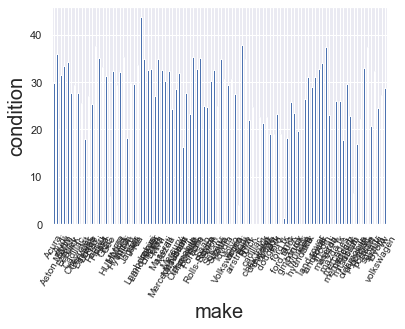

In [20]:
car_prices.groupby("make").mean()['condition'].plot(kind='bar')
plt.xlabel("make",fontsize=20)
plt.ylabel("condition",fontsize=20)
plt.xticks(rotation=60, fontsize = 10)
plt.show()

In [4]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
car_prices.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [33]:
car_prices.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='odometer', ylabel='sellingprice'>

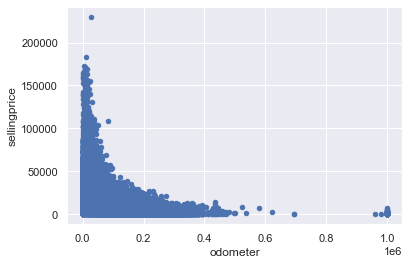

In [6]:
car_prices.plot(x= 'odometer', y = 'sellingprice', kind = 'scatter')

# Dealing with Outliers

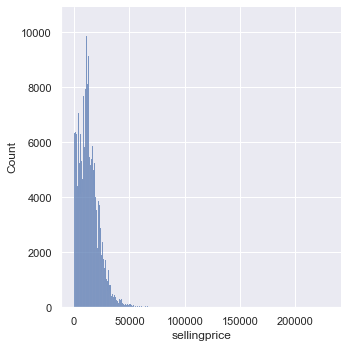

In [7]:
# understanding the distribution of the data
sns.displot(car_prices['sellingprice'])

In [ ]:
car_prices.plot(x ='body', kind = 'bar')

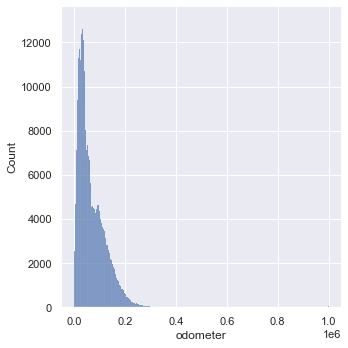

In [8]:
sns.displot(car_prices['odometer'])

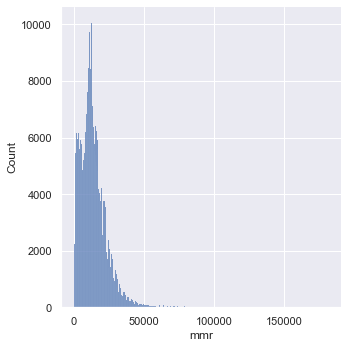

In [9]:
sns.displot(car_prices['mmr'])

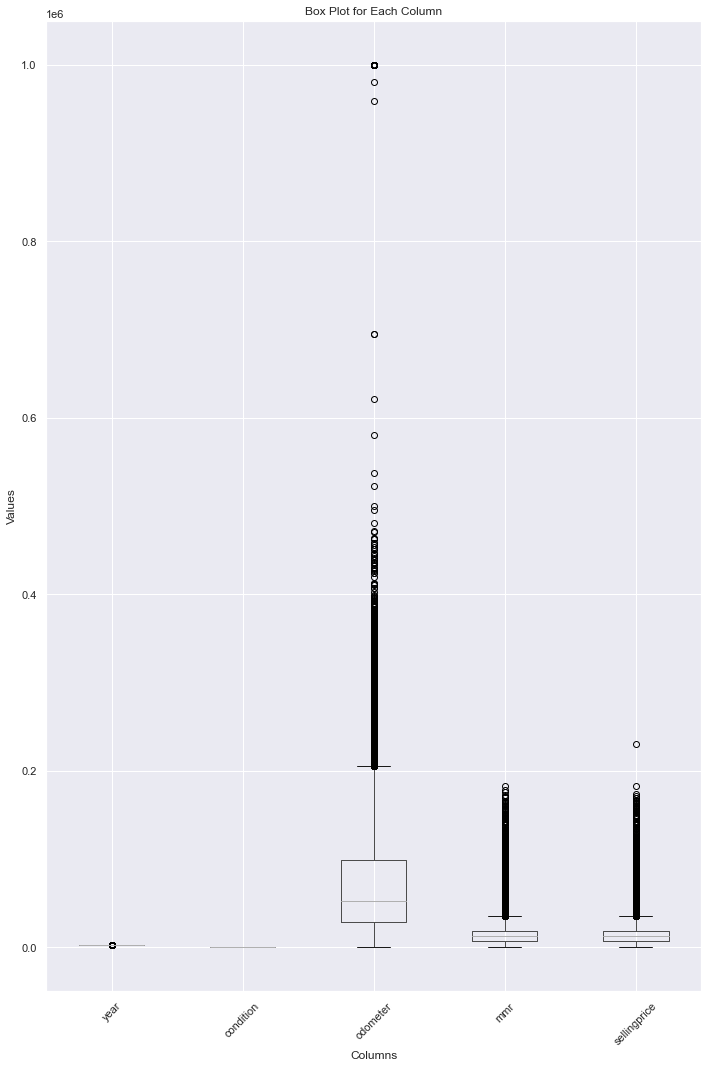

In [10]:
# Create a box plot to show outlier distribution
plt.figure(figsize=(10, 15))  
car_prices.boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot for Each Column')

plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [11]:
numeric_variables = car_prices[['odometer', 'mmr', 'sellingprice']]
th_percentile = numeric_variables.quantile(0.97)

#  Selecting all columns except the numeric variables
non_numeric_columns = car_prices.drop(columns=['odometer', 'mmr', 'sellingprice'])

#  Concatenating non-numeric columns with filtered numeric variables
clean_data = pd.concat([non_numeric_columns, numeric_variables[numeric_variables < th_percentile]], axis=1)

In [12]:
clean_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,color,interior,seller,saledate,odometer,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,white,black,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),16639.0,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,white,beige,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),9393.0,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,gray,black,financial services remarketing (lease),Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1331.0,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,white,black,volvo na rep/world omni,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),14282.0,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,gray,black,financial services remarketing (lease),Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2641.0,NaN,NaN


In [13]:
clean_data.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,color,interior,seller,saledate,odometer,mmr,sellingprice
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558088,558088,558837,558825,541980.000000,541872.000000,541853.000000
unique,NaN,96,973,1963,87,4,550297,64,NaN,46,17,14263,3766,NaN,NaN,NaN
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),NaN,NaN,NaN
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,110970,244329,19693,5334,NaN,NaN,NaN
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,NaN,NaN,NaN,NaN,63416.352037,12781.220980,12618.718878
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,NaN,NaN,NaN,NaN,44909.816925,7654.379595,7737.761823
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,25.000000,1.000000
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,27720.750000,6875.000000,6600.000000
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,50200.000000,12000.000000,11900.000000
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,94444.250000,17550.000000,17500.000000


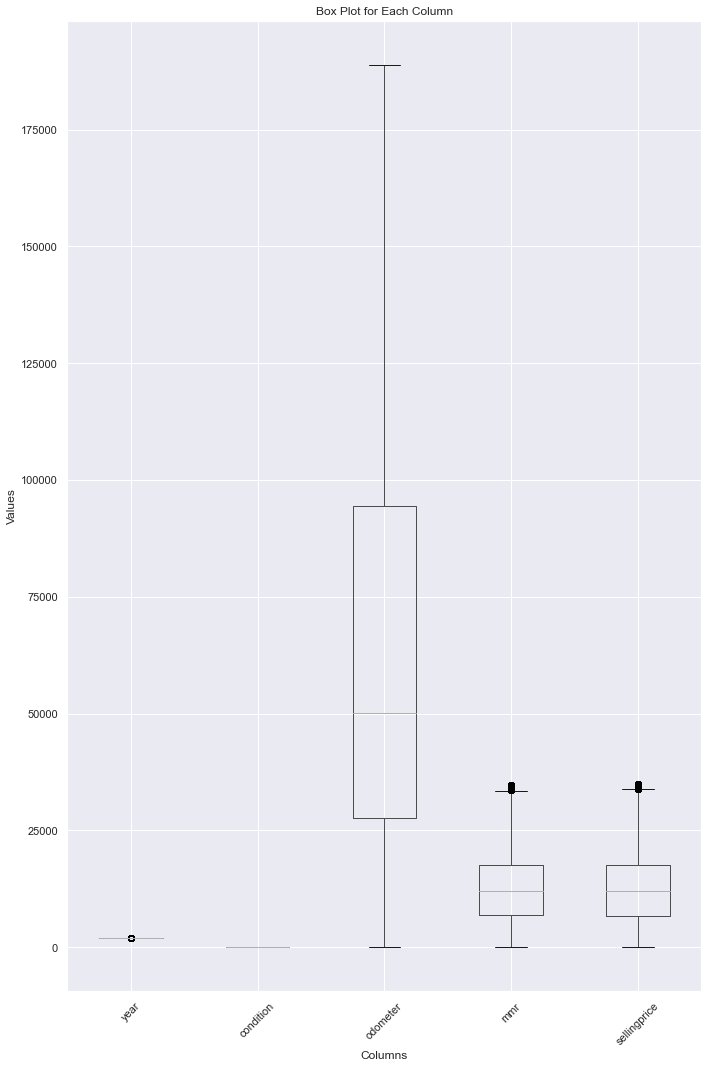

In [14]:
# visualising the current outlier distribution
plt.figure(figsize=(10, 15))  
clean_data.boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot for Each Column')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

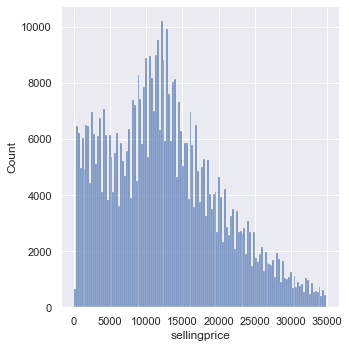

In [15]:
sns.displot(clean_data['sellingprice'])

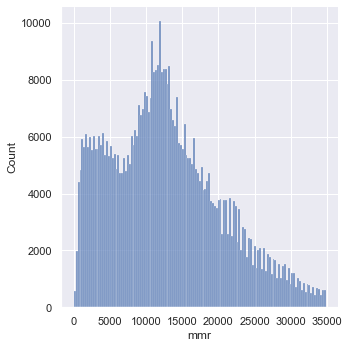

In [16]:
sns.displot(clean_data['mmr'])

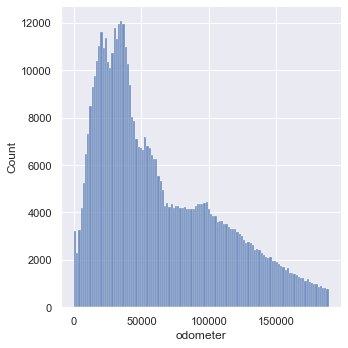

In [17]:
sns.displot(clean_data['odometer'])

# Dealing with missing values


In [18]:
clean_data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
color             749
interior          749
seller              0
saledate           12
odometer        16857
mmr             16965
sellingprice    16984
dtype: int64

In [19]:
# dealing with missing values for numerical data

clean_data = clean_data.dropna(subset = ['odometer', 'mmr', 'sellingprice','color','interior','make','trim','body','transmission'])
clean_data['condition'] = clean_data['condition'].fillna(clean_data['condition'].mean())

In [20]:
clean_data.shape

(453299, 16)

In [21]:
# dealing with missing values for categorical data

clean_data['color'] = clean_data['color'].fillna(clean_data['color'].mode)

# dealing with missing values for categorical data

clean_data['transmission'] = clean_data['transmission'].fillna(clean_data['transmission'].mode)
clean_data['color'] = clean_data['color'].fillna(clean_data['color'].mode)
clean_data['interior'] = clean_data['interior'].fillna("unknown")
clean_data['make'] = clean_data['make'].fillna("unknown")
clean_data['model'] = clean_data['model'].fillna("unknown")
clean_data['trim'] = clean_data['trim'].fillna("unknown")
clean_data['body'] = clean_data['body'].fillna("unknown")

In [22]:
clean_data.isnull().sum()

year            0
make            0
model           8
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
color           0
interior        0
seller          0
saledate        0
odometer        0
mmr             0
sellingprice    0
dtype: int64

In [23]:
clean_data.describe(include = 'all')

,year,make,model,trim,body,transmission,vin,state,condition,color,interior,seller,saledate,odometer,mmr,sellingprice
count,453299.000000,453299,453291,453299,453299,453299,453299,453299,453299.000000,453299,453299,453299,453299,453299.000000,453299.000000,453299.000000
unique,NaN,45,716,1395,81,2,446868,34,NaN,20,17,12485,3581,NaN,NaN,NaN
top,NaN,Ford,Altima,Base,Sedan,automatic,wp0ca2988xu629622,fl,NaN,black,black,ford motor credit company llc,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),NaN,NaN,NaN
freq,NaN,78414,16247,45974,171190,437695,4,72130,NaN,88067,200303,17457,4817,NaN,NaN,NaN
mean,2010.230830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.923125,NaN,NaN,NaN,NaN,64513.654572,13005.096746,12844.126601
std,3.707691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.986814,NaN,NaN,NaN,NaN,44605.193830,7408.813313,7512.090691
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,25.000000,1.000000
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,28972.500000,7500.000000,7200.000000
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,52047.000000,12150.000000,12000.000000
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,95552.500000,17600.000000,17500.000000


In [24]:
#checking for duplicates

clean_data.duplicated().sum()

0

In [26]:
clean_data.nunique()

year                26
make                45
model              716
trim              1395
body                81
transmission         2
vin             446868
state               34
condition           42
color               20
interior            17
seller           12485
saledate          3581
odometer        150278
mmr                748
sellingprice      1136
dtype: int64

# Exploratory Data Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x864 with 0 Axes>

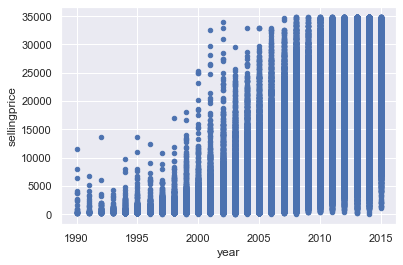

<Figure size 1440x864 with 0 Axes>

In [27]:
clean_data.plot(x= 'year', y = 'sellingprice', kind = 'scatter')

plt.figure(figsize=(20, 12))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='mmr'>

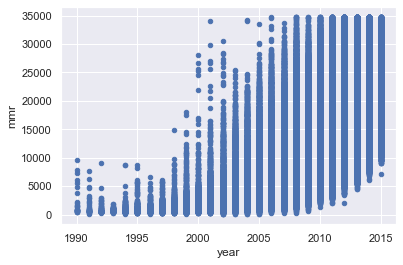

In [28]:
clean_data.plot(x= 'year', y = 'mmr', kind = 'scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mmr', ylabel='sellingprice'>

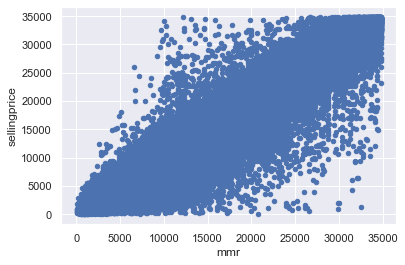

In [29]:
clean_data.plot(x= 'mmr', y = 'sellingprice', kind = 'scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='odometer', ylabel='sellingprice'>

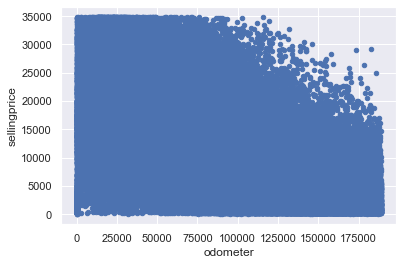

In [30]:
clean_data.plot(x= 'odometer', y = 'sellingprice', kind = 'scatter')

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

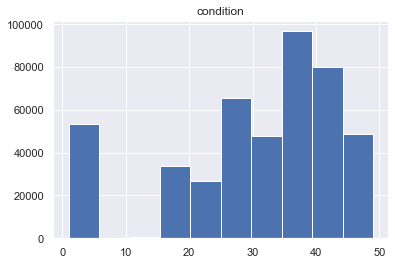

In [32]:
clean_data.hist(['condition'])

In [31]:
#Correlation matrix

numerical_columns = clean_data.select_dtypes(include=['float64', 'int64'])

numerical_columns.corr()
# selling price has a strong positive correlation with mmr, also has a strong negative correlation with odometer

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.302993,-0.784094,0.653716,0.638512
condition,0.302993,1.000000,-0.287365,0.287103,0.340486
odometer,-0.784094,-0.287365,1.000000,-0.656827,-0.647824
mmr,0.653716,0.287103,-0.656827,1.000000,0.976958
sellingprice,0.638512,0.340486,-0.647824,0.976958,1.000000


# Feature Engineering

In [34]:
# dropping features that are not useful for the model

clean_data.drop(['model', 'vin'], axis=1, inplace = True)

In [35]:
clean_data.dtypes

year              int64
make             object
trim             object
body             object
transmission     object
state            object
condition       float64
color            object
interior         object
seller           object
saledate         object
odometer        float64
mmr             float64
sellingprice    float64
dtype: object

In [36]:
#encoding categorical variables

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

data = ['make', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

# Label encode each column
for col in data:
    # Convert column to string if it's not already
    clean_data[col] = clean_data[col].astype(str)
    clean_data[col + '_encoded'] = label_encoder.fit_transform(clean_data[col])

clean_data.head()

,year,make,trim,body,transmission,state,condition,color,interior,seller,...,mmr,sellingprice,make_encoded,trim_encoded,body_encoded,transmission_encoded,state_encoded,color_encoded,interior_encoded,seller_encoded
0,2015,Kia,LX,SUV,automatic,ca,5.0,white,black,kia motors america inc,...,20500.0,21500.0,20,766,33,0,2,17,1,6300
1,2015,Kia,LX,SUV,automatic,ca,5.0,white,beige,kia motors america inc,...,20800.0,21500.0,20,766,33,0,2,17,0,6300
2,2014,BMW,328i SULEV,Sedan,automatic,ca,45.0,gray,black,financial services remarketing (lease),...,31900.0,30000.0,2,251,34,0,2,7,1,4344
3,2015,Volvo,T5,Sedan,automatic,ca,41.0,white,black,volvo na rep/world omni,...,27500.0,27750.0,43,1133,34,0,2,17,1,12080
5,2015,Nissan,2.5 S,Sedan,automatic,ca,1.0,gray,black,enterprise vehicle exchange / tra / rental / t...,...,15350.0,10900.0,30,101,34,0,2,7,1,4026


In [37]:
data_preprocessed = clean_data.drop(['make', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller'], axis = 1)
data_preprocessed.drop('saledate', axis =1 , inplace = True)

In [38]:
data_preprocessed.head()

,year,condition,odometer,mmr,sellingprice,make_encoded,trim_encoded,body_encoded,transmission_encoded,state_encoded,color_encoded,interior_encoded,seller_encoded
0,2015,5.0,16639.0,20500.0,21500.0,20,766,33,0,2,17,1,6300
1,2015,5.0,9393.0,20800.0,21500.0,20,766,33,0,2,17,0,6300
2,2014,45.0,1331.0,31900.0,30000.0,2,251,34,0,2,7,1,4344
3,2015,41.0,14282.0,27500.0,27750.0,43,1133,34,0,2,17,1,12080
5,2015,1.0,5554.0,15350.0,10900.0,30,101,34,0,2,7,1,4026


In [53]:
log_price = np.log(data_preprocessed['sellingprice'])
data_preprocessed['log_price'] = log_price
data_preprocessed.drop(['sellingprice'], axis = 1)

,year,condition,odometer,mmr,make_encoded,trim_encoded,body_encoded,transmission_encoded,state_encoded,color_encoded,interior_encoded,seller_encoded,log_price
0,2015,5.0,16639.0,20500.0,20,766,33,0,2,17,1,6300,9.975808
1,2015,5.0,9393.0,20800.0,20,766,33,0,2,17,0,6300,9.975808
2,2014,45.0,1331.0,31900.0,2,251,34,0,2,7,1,4344,10.308953
3,2015,41.0,14282.0,27500.0,43,1133,34,0,2,17,1,12080,10.230991
5,2015,1.0,5554.0,15350.0,30,101,34,0,2,7,1,4026,9.296518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,39.0,66403.0,20300.0,2,303,34,0,4,17,3,6585,10.034516
558833,2012,5.0,54393.0,30200.0,35,869,10,0,32,17,1,5656,10.335270
558834,2012,48.0,50561.0,29800.0,2,1390,33,0,2,1,1,4344,10.434116
558835,2015,38.0,16658.0,15100.0,30,101,72,0,5,17,1,4026,9.314700


# Regression


In [54]:
# assigning the dependent and independent variables

y = data_preprocessed['log_price']
x = data_preprocessed.drop('log_price', axis = 1)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)

StandardScaler()

In [56]:
scaled_data = scaler.transform(x)
scaled_data

array([[ 1.28629265, -1.99611331, -1.07329894, ...,  1.14146129,
        -0.70791278, -0.0114482 ],
       [ 1.28629265, -1.99611331, -1.23574657, ...,  1.14146129,
        -0.94698502, -0.0114482 ],
       [ 1.01658269,  1.08393717, -1.41648806, ..., -0.36585109,
        -0.70791278, -0.55563188],
       ...,
       [ 0.47716277,  1.31494095, -0.31280371, ..., -1.27023853,
        -0.70791278, -0.55563188],
       [ 1.28629265,  0.54492833, -1.07287298, ...,  1.14146129,
        -0.70791278, -0.64410345],
       [ 1.01658269,  0.23692329, -1.10986423, ..., -0.36585109,
         0.48744844, -0.4849659 ]])

In [57]:
#traintest split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42)

model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, random_state=42)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# making predictions with the test data
y_pred_test = model.predict(x_test)

# Evaluate the model's performance on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("R-squared (R2) on Test Data:", r2_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_test)

Mean Squared Error (MSE) on Test Data: 0.0006330508609092324
R-squared (R2) on Test Data: 0.9990698574107153
Mean Absolute Error (MAE) on Test Data: 0.00495459944745576
